In [63]:
import os
from itertools import islice

In [64]:
new='./driving_dataset'

In [65]:
from scipy import pi
import matplotlib.pyplot as plt
import random

In [66]:
train=os.path.join(new,'data.txt')
x=[]
y=[]
with open(train) as tr:
    for line in islice(tr,None):
        path,angle=line.strip().split()
        f_path=os.path.join(new,path)
        x.append(f_path)
        y.append(float(angle)*pi/180)

In [67]:
split=int(0.8*len(y))

In [68]:
c=list(zip(x,y))
random.shuffle(c)
x,y=zip(*c)
train_y=y[:split]
train_x=x[:split]
test_y=y[split:]
test_x=x[split:]

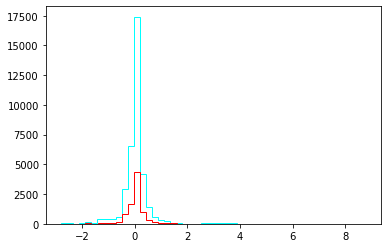

In [69]:
plt.hist(train_y,color='cyan',bins=50,histtype='step')
plt.hist(test_y,color='red',bins=50,histtype='step')
plt.show()

In [70]:
import numpy as np

In [71]:
train_y_mean=np.mean(train_y)

In [72]:
train_y_mean

0.029353109188829336

In [79]:
l=len(y)

In [80]:
import cv2
num_train_images = len(train_x)
num_val_images = len(test_x)
train_batch_pointer=0
val_batch_pointer=0

In [77]:
def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(cv2.resize(cv2.imread(train_x[(train_batch_pointer + i) % num_train_images])[-150:], (200, 66)) / 255.0)
        y_out.append([train_y[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

In [78]:
def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(cv2.resize(cv2.imread(test_x[(val_batch_pointer + i) % num_val_images])[-150:], (200, 66)) / 255.0)
        y_out.append([test_y[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out
